## ML_Assignment_9
1. What is feature engineering, and how does it work? Explain the various aspects of feature engineering in depth.
2. What is feature selection, and how does it work? What is the aim of it? What are the various methods of function selection?
3. Describe the function selection filter and wrapper approaches. State the pros and cons of each approach?
4. i. Describe the overall feature selection process.
   ii. Explain the key underlying principle of feature extraction using an example. What are the most widely used function 
   extraction algorithms?
5. Describe the feature engineering process in the sense of a text categorization issue.
6. What makes cosine similarity a good metric for text categorization? A document-term matrix has two rows with values of (2, 3, 2, 0, 2, 3, 3, 0, 1) and (2, 1, 0, 0, 3, 2, 1, 3, 1). Find the resemblance in cosine.
7. i. What is the formula for calculating Hamming distance? Between 10001011 and 11001111, calculate the Hamming gap.

    ii. Compare the Jaccard index and similarity matching coefficient of two features with values (1, 1, 0, 0, 1, 0, 1, 1) and 
    (1, 1, 0, 0, 0, 1, 1, 1), respectively (1, 0, 0, 1, 1, 0, 0, 1).
8. State what is meant by  "high-dimensional data set"? Could you offer a few real-life examples? What are the difficulties in using machine learning techniques on a data set with many dimensions? What can be done about it?

9. Make a few quick notes on:

    1. PCA is an acronym for Personal Computer Analysis.

    2. Use of vectors

    3. Embedded technique

10. Make a comparison between:

    1. Sequential backward exclusion vs. sequential forward selection

    2. Function selection methods: filter vs. wrapper

    3. SMC vs. Jaccard coefficient

### Ans 1

Feature engineering is the process of creating new features from existing data to improve the performance of machine learning models. It involves transforming, selecting, or generating new attributes that enhance a model's ability to understand patterns and relationships in the data. Key aspects of feature engineering include:

1. **Feature Extraction:** Creating new features by transforming or extracting information from existing ones. For example, extracting the month and year from a date variable.

2. **Feature Transformation:** Applying mathematical functions (e.g., logarithms, scaling) to make the data more suitable for modeling.

3. **Feature Selection:** Choosing the most relevant features to reduce dimensionality and eliminate noise.

4. **Handling Categorical Data:** Encoding categorical variables into numerical representations (e.g., one-hot encoding).

5. **Dealing with Missing Data:** Imputing or filling missing values in features.

6. **Creating Interaction Terms:** Combining features to capture interactions between them.

7. **Handling Outliers:** Identifying and addressing outliers that may affect model performance.

In this example, we create a new feature 'Interaction' by multiplying 'Feature1' and 'Feature2,' which is a form of feature engineering to capture potential interactions between these variables.

In [1]:
import pandas as pd

# Sample dataset
data = {
    'Feature1': [1, 2, 3, 4],
    'Feature2': [0.5, 1.0, 1.5, 2.0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create an interaction term between Feature1 and Feature2
df['Interaction'] = df['Feature1'] * df['Feature2']
df

,Feature1,Feature2,Interaction
0,1,0.5,0.5
1,2,1.0,2.0
2,3,1.5,4.5
3,4,2.0,8.0


### Ans 2

**Feature selection** is the process of choosing a subset of relevant features (variables or attributes) from the original set of features in a dataset. Its primary aim is to improve model performance by reducing dimensionality, increasing model interpretability, and mitigating issues like overfitting. Feature selection methods work by identifying and retaining the most informative features while discarding irrelevant or redundant ones.

Key methods of feature selection include:

1. **Filter Methods:** These techniques evaluate each feature independently based on statistical metrics (e.g., correlation, mutual information) and select the top-ranked features. An example using mutual information:

```python
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=3)
X_new = selector.fit_transform(X, y)
```

2. **Wrapper Methods:** These methods use a machine learning model's performance as a criterion for feature selection. Techniques like forward selection, backward elimination, and recursive feature elimination (RFE) iteratively evaluate feature subsets. An example using RFE:

```python
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
selector = RFE(model, 3)
X_new = selector.fit_transform(X, y)
```

3. **Embedded Methods:** These are model-specific feature selection techniques integrated into machine learning algorithms. Models like Lasso regression and tree-based algorithms perform feature selection during training. An example using Lasso regression:

```python
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01)
model.fit(X, y)
selected_features = X.columns[model.coef_ != 0]
```

These methods aim to improve model efficiency, reduce overfitting, and enhance interpretability by selecting the most relevant features for a given task.

### Ans 3

**Filter Approach:**

- **Description:** Filter methods evaluate the relevance of individual features independently of a specific machine learning model. They use statistical metrics such as correlation, mutual information, or chi-squared tests to rank or score each feature based on its relationship with the target variable. Features are then selected or ranked based on these scores.

- **Pros:**
  1. **Efficiency:** Filter methods are computationally efficient because they don't involve training a machine learning model.
  2. **Independence:** They are model-agnostic, making them suitable for any algorithm.
  3. **Interpretability:** Filter scores can provide insights into feature importance.

- **Cons:**
  1. **Limited Context:** Filter methods consider features in isolation and may not capture complex feature interactions.
  2. **Risk of Overlooking Relevance:** Features deemed irrelevant individually might still contribute when considered together.

**Wrapper Approach:**

- **Description:** Wrapper methods evaluate feature subsets by employing a specific machine learning model. They use the model's performance (e.g., accuracy, F1-score) as a criterion for selecting features. Wrapper methods can be iterative, including forward selection, backward elimination, and recursive feature elimination (RFE).

- **Pros:**
  1. **Feature Interaction:** Wrapper methods can capture feature interactions and dependencies, providing a more accurate assessment of feature relevance.
  2. **Model-Centric:** They select features that directly improve the chosen model's performance.

- **Cons:**
  1. **Computational Cost:** Wrapper methods are computationally expensive as they require training and evaluating multiple models.
  2. **Overfitting Risk:** There's a risk of overfitting to the specific model used in the evaluation, leading to suboptimal generalization.

Choosing between filter and wrapper approaches depends on the specific problem, dataset, and computational resources available. Filters are efficient but may miss complex relationships, while wrappers can capture interactions but are computationally costly. Hybrid approaches combining filter and wrapper techniques are also common in practice.

### Ans 4

**i. Overall Feature Selection Process:**

The feature selection process involves identifying and retaining the most relevant features from a dataset while discarding irrelevant or redundant ones to enhance machine learning model performance. The process typically consists of these steps:

1. **Data Preparation:** Load and preprocess the dataset, including handling missing values, encoding categorical variables, and splitting data into training and testing sets.

2. **Feature Ranking/Scoring:** Employ filter methods to rank or score features based on their relevance to the target variable. Common metrics include correlation, mutual information, and chi-squared tests.

3. **Feature Selection:** Choose the top-ranked features or a specific number of features based on the ranking scores. Filter methods directly select features at this stage.

4. **Model Training and Evaluation:** Train a machine learning model using the selected features and evaluate its performance using cross-validation or other appropriate techniques.

5. **Iterative Refinement:** Repeat the process, fine-tuning feature selection and model parameters, as needed, to achieve the desired model performance.

**ii. Key Principle of Feature Extraction:**

Feature extraction aims to transform the original data into a new feature space by creating composite features that capture relevant information. A key principle is to reduce dimensionality while retaining as much information as possible. For example, Principal Component Analysis (PCA) is a widely used feature extraction technique that projects data into a lower-dimensional space while preserving data variance.

```python
from sklearn.decomposition import PCA

# Sample data
X = ...  # Feature matrix

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
```

PCA identifies linear combinations of the original features that explain the most variance in the data, effectively reducing dimensionality. Other commonly used feature extraction algorithms include Linear Discriminant Analysis (LDA) for supervised dimensionality reduction and autoencoders for deep learning-based feature extraction. These techniques help capture essential information and improve model efficiency.

### Ans 5

In the context of text categorization, the feature engineering process involves transforming raw text data into a structured format that can be used for machine learning. Here's a brief overview of the process:

1. **Text Preprocessing:** Clean and preprocess the text data by removing special characters, punctuation, and stop words. Tokenize the text into words or phrases.

2. **Feature Extraction:** Convert the text into numerical features that machine learning models can work with. Common techniques include TF-IDF (Term Frequency-Inverse Document Frequency) and word embeddings like Word2Vec or GloVe.

3. **Feature Selection:** Choose relevant features for the categorization task. You can apply techniques like chi-squared tests or information gain to select the most informative words or phrases.

4. **Vectorization:** Transform the selected features into a numerical feature matrix that represents the documents in the dataset.

5. **Model Training:** Use the feature matrix and corresponding labels to train a text classification model, such as a Naive Bayes classifier or a deep learning model like a recurrent neural network (RNN) or a transformer-based model like BERT.

This code loads a subset of the 20 newsgroups dataset, performs text preprocessing, applies TF-IDF feature extraction, trains a Naive Bayes classifier, calculates accuracy, and plots a confusion matrix to visualize the classification results.

Accuracy: 0.5419098143236074


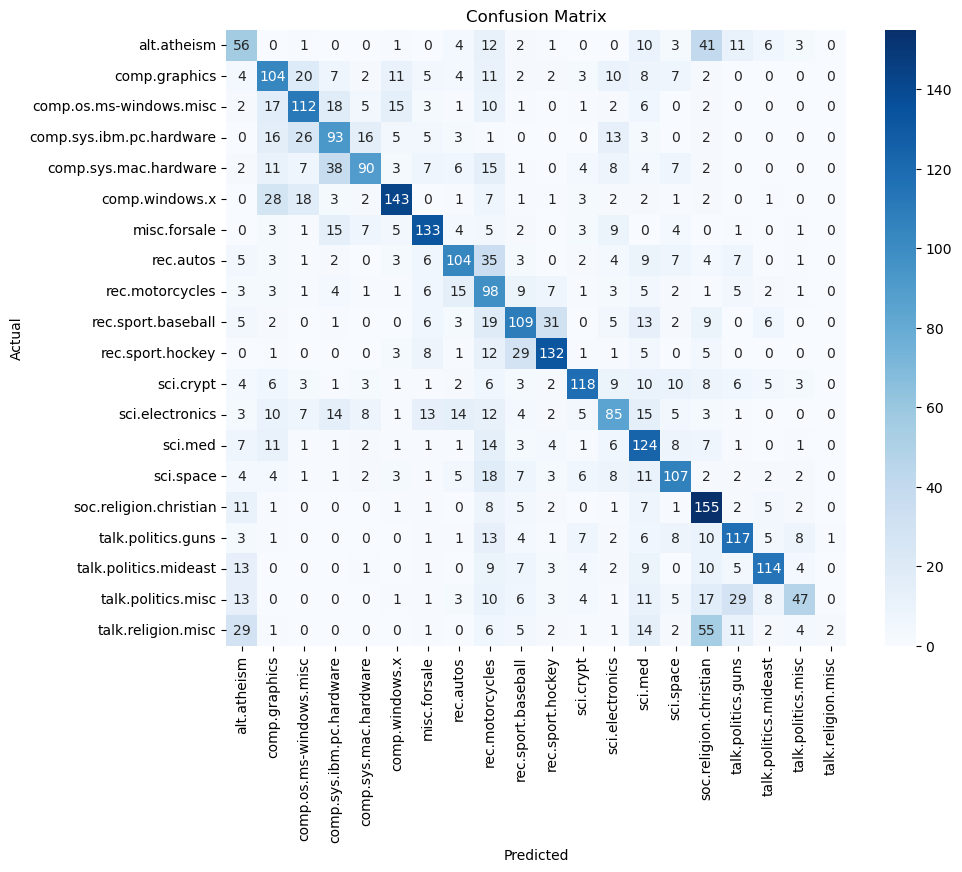

In [4]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 20 newsgroups dataset (a subset for simplicity)
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = newsgroups.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Ans 6

**Cosine similarity** is a popular metric for text categorization and document similarity analysis because it effectively captures the semantic similarity between two text documents regardless of their length. Here's why cosine similarity is a good metric for text categorization:

1. **Scale Invariance:** Cosine similarity is scale-invariant, meaning it doesn't depend on the magnitude of the vectors but rather on their direction. In text analysis, the frequency of terms in a document can vary widely, but cosine similarity still works well because it focuses on term patterns.

2. **Robust to Document Length:** Unlike metrics like Euclidean distance, cosine similarity is robust to differences in document lengths. It emphasizes the similarity of term patterns, allowing it to identify documents with similar content but different lengths.

3. **Ignores Common Terms:** Cosine similarity ignores common terms that appear in many documents (e.g., "the," "and") since their impact on the similarity score is minimal.

The calculated cosine similarity between the two document vectors is a numerical value between -1 and 1, where 1 indicates identical documents, 0 indicates no similarity, and -1 indicates completely dissimilar documents. In this case, the cosine similarity score quantifies the resemblance in terms of their content patterns.

In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define the two document-term vectors
doc1 = np.array([2, 3, 2, 0, 2, 3, 3, 0, 1])
doc2 = np.array([2, 1, 0, 0, 3, 2, 1, 3, 1])

# Calculate cosine similarity
similarity = cosine_similarity([doc1], [doc2])

print("Cosine Similarity:", similarity[0][0])

Cosine Similarity: 0.6753032524419089


### Ans 7

**i. Hamming Distance:**

The **Hamming distance** is a metric used to measure the difference between two equal-length binary strings. It calculates the number of positions at which the corresponding bits are different. The formula for calculating the Hamming distance between two binary strings is:

                \[
                \text{Hamming Distance} = \sum_{i=1}^{n} \text{bit}(a_i) \oplus \text{bit}(b_i)
                \]

Where:
- \(\text{bit}(a_i)\) and \(\text{bit}(b_i)\) are the bits at position \(i\) in binary strings \(a\) and \(b\).
- \(\oplus\) denotes the XOR (exclusive OR) operation.
- \(n\) is the length of the binary strings.

Let's calculate the Hamming distance between the binary strings "10001011" and "11001111":

\[
\begin{align*}
\text{Hamming Distance} &= (1 \oplus 1) + (0 \oplus 1) + (0 \oplus 0) + (0 \oplus 0) + (1 \oplus 1) + (0 \oplus 1) + (1 \oplus 1) + (1 \oplus 1) \\
&= 1 + 1 + 0 + 0 + 0 + 1 + 0 + 0 \\
&= 3
\end{align*}
\]

So, the Hamming distance between "10001011" and "11001111" is 3.

**ii. Jaccard Index and Similarity Matching Coefficient:**

The **Jaccard Index** and **Similarity Matching Coefficient (SMC)** are both similarity metrics used to measure the similarity between two sets.

- **Jaccard Index (J)**: It is calculated as the size of the intersection of two sets divided by the size of their union. The Jaccard index ranges from 0 (no similarity) to 1 (complete similarity).

\[
J(A, B) = \frac{|A \cap B|}{|A \cup B|}
\]

- **Similarity Matching Coefficient (SMC)**: It is calculated as the size of the intersection of two sets divided by the size of their Cartesian product. The SMC also ranges from 0 to 1.

\[
SMC(A, B) = \frac{|A \cap B|}{|A \times B|}
\]

Now, let's calculate Jaccard Index and SMC for the sets:
    - (A = \{1, 1, 0, 0, 1, 0, 1, 1\}\)
    - (B = \{1, 1, 0, 0, 0, 1, 1, 1\}\)
    - (C = \{1, 0, 0, 1, 1, 0, 0, 1\}\)

1. Jaccard Index:

    J(A, B) = \frac{|A \cap B|}{|A \cup B|} = \frac{5}{7}

    J(A, C) = \frac{|A \cap C|}{|A \cup C|} = \frac{4}{8} = \frac{1}{2}


2. Similarity Matching Coefficient:
    
    SMC(A, B) = \frac{|A \cap B|}{|A \times B|} = \frac{5}{8}
    
    SMC(A, C) = \frac{|A \cap C|}{|A \times C|} = \frac{4}{8} = \frac{1}{2}

So, the Jaccard Index and SMC for sets A and B are both \(5/7\) and \(5/8\), respectively. For sets A and C, they are \(1/2\) and \(1/2\), respectively. These metrics measure the similarity between sets of binary values.

### Ans 8

A **high-dimensional dataset** refers to a dataset with a large number of features or dimensions compared to the number of samples or observations. In such datasets, each data point is represented by a vector in a high-dimensional space, and the number of dimensions greatly exceeds the number of data points. High-dimensional datasets are common in various fields and can pose several challenges in machine learning:

**Real-Life Examples of High-Dimensional Data:**
1. **Genomic Data:** Gene expression data or DNA sequences with thousands of genes or nucleotides.
2. **Image Data:** Images represented as pixel values, resulting in high-dimensional feature vectors.
3. **Text Data:** Documents represented using TF-IDF or word embeddings, resulting in high-dimensional text vectors.
4. **Sensor Data:** IoT devices generating multivariate time series data with numerous sensor readings.
5. **Social Networks:** Graph-based data with nodes representing users and high-dimensional features associated with each user.

**Challenges with High-Dimensional Data:**
1. **Curse of Dimensionality:** As the dimensionality increases, the data points become more sparse, making it difficult to generalize models.
2. **Increased Computational Complexity:** Many machine learning algorithms become computationally expensive in high dimensions.
3. **Overfitting:** High-dimensional data can lead to overfitting due to the large number of features relative to the data points.
4. **Reduced Model Interpretability:** It becomes challenging to interpret and visualize high-dimensional data and model results.

**Methods to Address High-Dimensional Data:**
1. **Feature Selection:** Identify and select the most informative features while discarding irrelevant or redundant ones to reduce dimensionality.
2. **Feature Extraction:** Use techniques like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) to transform high-dimensional data into lower-dimensional representations.
3. **Regularization:** Apply regularization techniques like L1 (Lasso) or L2 (Ridge) regularization to penalize unnecessary features.
4. **Dimensionality Reduction:** Use algorithms like PCA or autoencoders to project data into a lower-dimensional subspace while preserving important information.
5. **Ensemble Methods:** Combine multiple models to reduce the risk of overfitting and improve generalization in high-dimensional settings.

Addressing the challenges of high-dimensional data often involves a combination of these techniques to improve model performance and interpretability.

### Ans 9

1. **PCA (Principal Component Analysis):** PCA stands for Principal Component Analysis, not Personal Computer Analysis. It is a dimensionality reduction technique used in data analysis and machine learning to transform high-dimensional data into a lower-dimensional representation while preserving variance.

2. **Use of Vectors:** Vectors are mathematical objects used to represent quantities with magnitude and direction. In machine learning, vectors are commonly used to represent data points and features in a high-dimensional space.

3. **Embedded Technique:** An embedded technique in machine learning refers to feature selection or dimensionality reduction methods that are integrated into the learning process, such as L1 regularization in linear models or tree-based feature importance. These techniques aim to select the most relevant features during model training.

### Ans 10

1. **Sequential Backward Exclusion vs. Sequential Forward Selection:** In feature selection, Sequential Backward Exclusion starts with all features and iteratively removes the least significant ones, while Sequential Forward Selection starts with no features and adds the most significant ones. The former may lead to suboptimal solutions, while the latter may miss relevant features.

2. **Function Selection Methods - Filter vs. Wrapper:** Filter methods evaluate feature relevance independently of a model, while wrapper methods use a specific model's performance. Filter methods are computationally efficient but may miss interactions, while wrapper methods consider interactions but are computationally expensive.

3. **SMC vs. Jaccard Coefficient:** SMC (Similarity Matching Coefficient) measures similarity as the intersection of sets divided by the Cartesian product. Jaccard Coefficient measures similarity as the intersection divided by the union of sets. SMC can be higher for binary data, while Jaccard is more general and suitable for various data types.